In [1]:
import pandas as pd     #importing Pandas for dataframe operations
import seaborn as sns   #Imorting seaborn for visualizations
import numpy as np       # importing numpy for numerical operations
import matplotlib.pyplot as plt #importing for plotting & visualizations

#importing training dataset
df = pd.read_csv('Project2.csv')
test_df=pd.read_csv('Project2.csv') #test_df as dataframe name
df.head(10) #show first rows for dataframe
df.info() # Show information of Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Transaction_ID      20 non-null     int64 
 1   Customer_ID         20 non-null     int64 
 2   Transaction_Amount  20 non-null     int64 
 3   Location            20 non-null     object
 4   Time_of_Day         20 non-null     object
 5   Is_Fraudulent       20 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


In [2]:
df.head() #Showing top rows of Dataframe

,Transaction_ID,Customer_ID,Transaction_Amount,Location,Time_of_Day,Is_Fraudulent
0,1,101,1000,Mumbai,Morning,0
1,2,102,500,Delhi,Afternoon,1
2,3,103,2000,Chennai,Evening,0
3,4,104,300,Gujarat,Morning,1
4,5,105,800,Bengalore,Afternoon,0


In [3]:
df.info()#Checking converted datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Transaction_ID      20 non-null     int64 
 1   Customer_ID         20 non-null     int64 
 2   Transaction_Amount  20 non-null     int64 
 3   Location            20 non-null     object
 4   Time_of_Day         20 non-null     object
 5   Is_Fraudulent       20 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


<Axes: xlabel='Is_Fraudulent', ylabel='Count'>

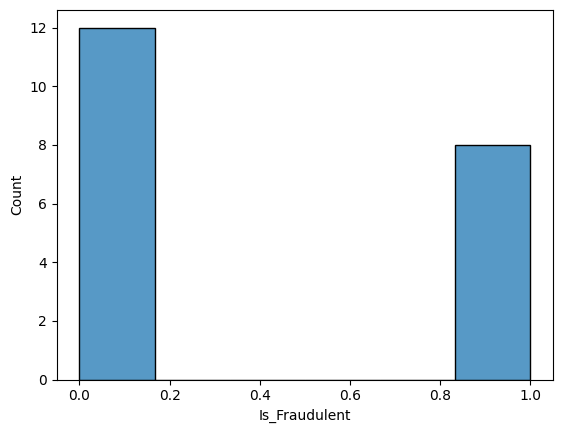

In [4]:
#Checking for no of count for each output for determining whether dataset is balance or not
sns.histplot(df['Is_Fraudulent'])
#Dataset is Balanced partiallly

In [5]:
#Checking for Null Values for Each features
df.isna().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Amount    0
Location              0
Time_of_Day           0
Is_Fraudulent         0
dtype: int64

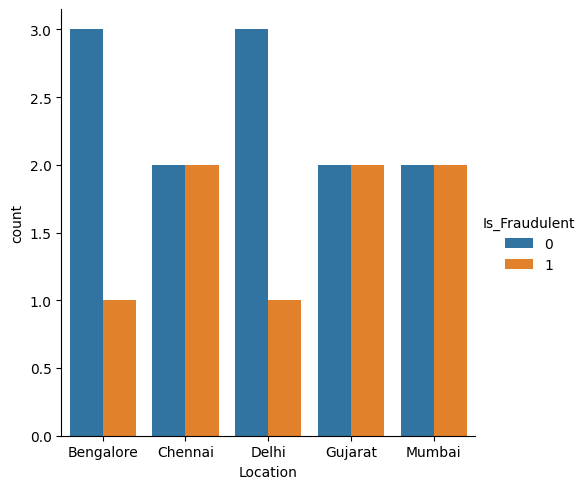

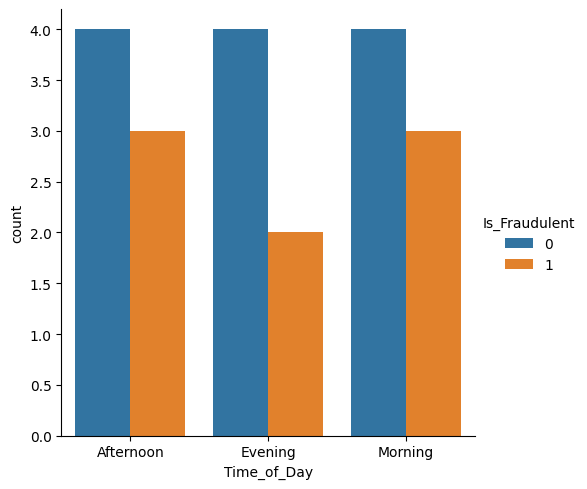

In [6]:
# EDA & Visualization of dataframe
# Changing datatype for columns.
df['Is_Fraudulent']=df['Is_Fraudulent'].astype('category') #dividing Fraud into 0for not fraud  &1 for fraud
df['Location']=df['Location'].astype('category')#divide base on Location hence category
df['Customer_ID']=df['Customer_ID'].astype('str')
df['Transaction_ID']=df['Transaction_ID'].astype('str')
df['Time_of_Day']=df['Time_of_Day'].astype('category')#divide base on Time of day hence category

sns.catplot(x='Location',hue='Is_Fraudulent', kind='count', data=df) #Categorical plot of dataframe showing
#fraud and non fraud acivities from each location.
sns.catplot(x='Time_of_Day',hue='Is_Fraudulent', kind='count', data=df) #Categorical plot of dataframe showing
#fraud and non fraud acivities from day of time.

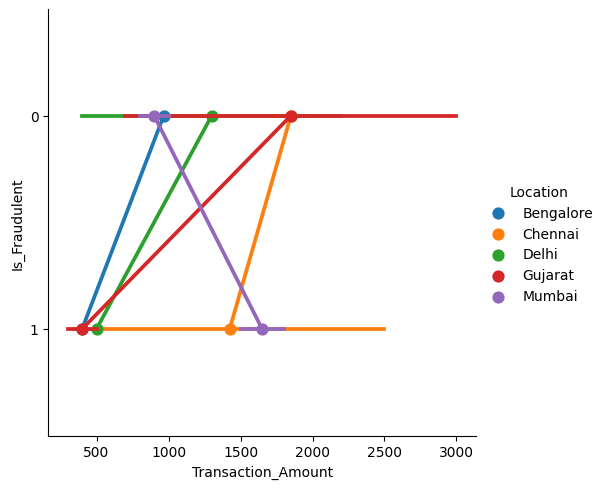

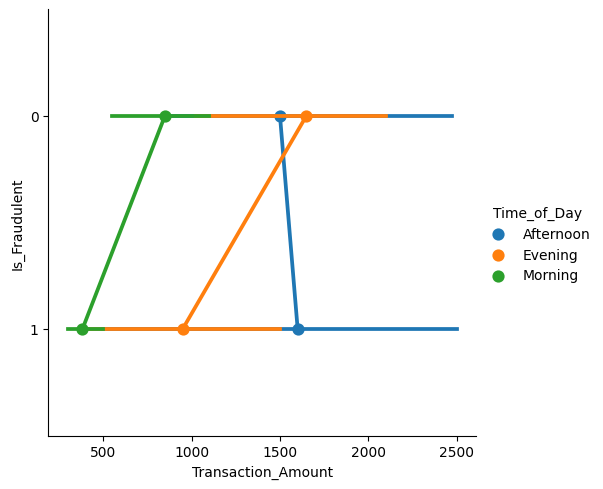

In [7]:
sns.catplot(x='Transaction_Amount',y='Is_Fraudulent',hue='Location', kind='point', data=df)
sns.catplot(x='Transaction_Amount',y='Is_Fraudulent',hue='Time_of_Day', kind='point', data=df)

<Axes: >

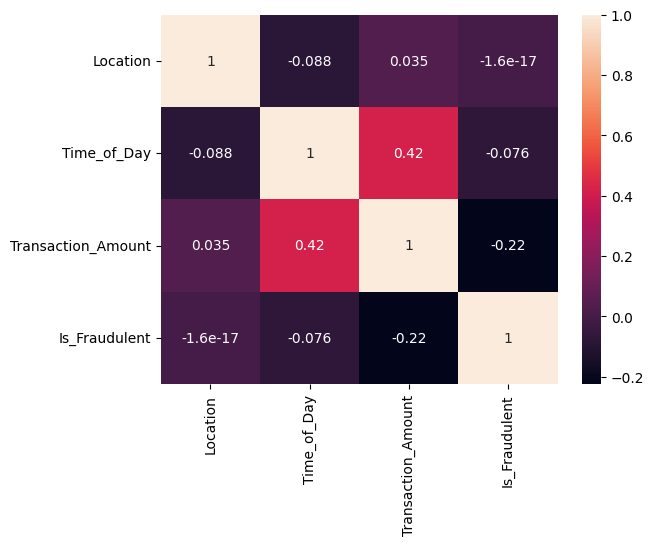

In [8]:
#Encoding for Correlatin matrix
df['Is_Fraudulent']=df['Is_Fraudulent'].astype('float')
df['Location']=[int(0) if i=='Bengalore' else i for i in df['Location']]
df['Location']=[int(1) if i=='Chennai' else i for i in df['Location']]
df['Location']=[int(2) if i=='Gujarat' else i for i in df['Location']]
df['Location']=[int(3) if i=='Mumbai' else i for i in df['Location']]
df['Location']=[int(4) if i=='Delhi' else i for i in df['Location']]

df['Time_of_Day']=[int(0) if i=='Morning' else i for i in df['Time_of_Day']]
df['Time_of_Day']=[int(1) if i=='Afternoon' else i for i in df['Time_of_Day']]
df['Time_of_Day']=[int(2) if i=='Evening' else i for i in df['Time_of_Day']]

cols = ["Location","Time_of_Day","Transaction_Amount","Is_Fraudulent"]
train_corr = df[cols].corr()
sns.heatmap(train_corr,annot=True)

In [9]:
from sklearn.model_selection import train_test_split #importing trains test split for dividing dataframe in train and test

predictors = df.drop(['Is_Fraudulent', 'Customer_ID','Transaction_ID'], axis=1) #defining features.
target = df["Is_Fraudulent"] #defining outcome data to be predicted.
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)#Test dataset as 20% of original dataset State is set at 0

In [10]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

75.0


In [11]:
#Hyper parametr optimization
from sklearn.model_selection import GridSearchCV #importing GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Importing random forest classifier model
X, Y = predictors,target # specifing target and independent feature

In [12]:
n_estimators = [int(x) for x in np.linspace(start=0,stop=20,num=10)] # Select no of Trees from 10 to 80 with 10 Number
#Feature selection on which model prediction will take place
max_features = ['Tansaction_Amount','Location','Time_of_day']
#Max Depth of decision Tree to choose from 2 to 8
max_depth=[2,8]
#Min sample required before splitting in decision tree from 2 to 10
min_samples_split =[2,10]
# choose whether to introduce bootstrapping in dataset for training decision trees or not
bootstrap=[True, False]

In [13]:
# Declaring model of Random forest classifier
model = RandomForestClassifier(random_state=0)#seed value of 42 for selecting same data everytime
param_grid = {
    'n_estimators': n_estimators,  # Number of trees in the forest
    'max_depth': max_depth,      # Maximum depth of the tree
    'min_samples_split': min_samples_split,       # Minimum number of samples required to split an internal node
    'bootstrap' : bootstrap
}
print(param_grid)

{'n_estimators': [0, 2, 4, 6, 8, 11, 13, 15, 17, 20], 'max_depth': [2, 8], 'min_samples_split': [2, 10], 'bootstrap': [True, False]}


In [14]:
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(estimator = model, param_grid=param_grid, cv =4, verbose=2, n_jobs =4)
#providing estimator as random forest classifier
# Parametric grid as param_grid
#Cross validation is selected as 10.
# verbose = 2 for Print progress bars for each parameter and print the best parameters once the grid search is complete.
#n_jobs =4 as 4 core will be used for parellel training.

In [15]:
Grid.fit(x_train,y_train) # Fitting training dataset over Grid model declared above.

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
32 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 8],
                         'min_samples_split': [2, 10],
                         'n_estimators': [0, 2, 4, 6, 8, 11, 13, 15, 17, 20]},
             verbose=2)

In [16]:
Grid.best_params_#Printing best parameters with values.

{'bootstrap': False,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [17]:
best_predictions = Grid.predict(x_val)
print(best_predictions)

[0. 0. 0. 0.]


In [18]:
train_Accuracy = Grid.score(x_train,y_train) #Accuracy for traing dataset
print((train_Accuracy)*100)#print train accuracy
best_accuracy = accuracy_score(y_val, best_predictions)#Accuracy for test dataset.

81.25


In [19]:
Grid.predict(x_val)

array([0., 0., 0., 0.])

In [20]:
x_val

,Transaction_Amount,Location,Time_of_Day
18,500,2,0
1,500,4,1
19,900,0,1
8,700,2,2


In [21]:
# Collect user input for columns
column_names = ('Transaction_Amount','Location','Time_of_Day')
# Initialize an empty dictionary to store user input data
data_dict = {}
# Collect data for each column from the user
for column in column_names:
    user_input = input(f"Enter data for column '{column}': ").split(',')
    data_dict[column] = user_input

# Create a DataFrame from the user input
df2 = pd.DataFrame(data_dict)

#Encoding for predicting uservalue
df2['Location']=[int(0) if i=='Bengalore' else i for i in df2['Location']]
df2['Location']=[int(1) if i=='Chennai' else i for i in df2['Location']]
df2['Location']=[int(2) if i=='Gujarat' else i for i in df2['Location']]
df2['Location']=[int(3) if i=='Mumbai' else i for i in df2['Location']]
df2['Location']=[int(4) if i=='Delhi' else i for i in df2['Location']]

df2['Time_of_Day']=[int(0) if i=='Morning' else i for i in df2['Time_of_Day']]
df2['Time_of_Day']=[int(1) if i=='Afternoon' else i for i in df2['Time_of_Day']]
df2['Time_of_Day']=[int(2) if i=='Evening' else i for i in df2['Time_of_Day']]
print(df2)

if Grid.predict(df2) == 0:
 print("Not Fraudulent")
if Grid.predict(df2) == 1:
 print("Fraudulent")

Enter data for column 'Transaction_Amount': 400
Enter data for column 'Location': Delhi
Enter data for column 'Time_of_Day': Evening
  Transaction_Amount  Location  Time_of_Day
0                400         4            2
Not Fraudulent
